In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from pattern_contrast.fibheap import FibonacciHeap as FibHeap
from pattern_contrast.peel_by_motif import *
from pattern_contrast.utils import *

import random
import pandas as pd
from datetime import datetime
import graph_tool.all as gt

In [2]:
import dsd
import pyintergraph
plt.rcParams.update({'font.size': 16})

In [3]:
gt_Gs = []
nx_Gs = []
idx = 8
edge_df = pd.read_csv('dataset/Timelapsed/C-elegans-timelapsed-0'+str(idx)+'-condensed-edges.csv', header=0, dtype={'Weight':'double'})
G = nx.from_pandas_edgelist(edge_df, 'Pre Synaptic Neuron ID', 'Post Synaptic Neuron ID', create_using=nx.DiGraph())
G = nx.convert_node_labels_to_integers(G)
g = pyintergraph.nx2gt(G)
rand_motif3 = gt.motifs(g, 3, return_maps=True)
    
    

In [4]:
def multi_dsd(rand_motif3, node_num, dsd_times=5, draw=True):
    results = []
    densities = []
    
    for i in range(13):
        cur_motif_list = rand_motif3[2][i]
        motif_list_by_nodelist = [list(m) for m in cur_motif_list]
        sub_re = [[] for dummy in range(dsd_times)]
        sub_den = [0.0 for dummy in range(dsd_times)]
        for j in range(dsd_times):
            result_s, density = dsd.exact_densest(motif_list_by_nodelist)
            nxt_motif_list = []
            for motif in motif_list_by_nodelist:
                if not any(m in result_s for m in motif):
                    nxt_motif_list.append(motif)

            motif_list_by_nodelist = nxt_motif_list

    #         motif_list_by_nodelist = [motif for motif in motif_list_by_nodelist if all(m in result_s for m in motif)]
            sub_re[j] = result_s
            sub_den[j] = density
            if len(motif_list_by_nodelist)==0:
                print('No more motif', i, 'left after finding', j+1, 'densest subgraph')
                break
        results.append(sub_re)
        densities.append(sub_den)
    
    global_den = np.array(rand_motif3[1])/node_num
        
    if draw:
        x_ticks = [str(i) for i in range(1,14)]
        labels = ['1st', '2nd','3rd','4th','5th']
        for j in range(dsd_times):
            plt.plot(x_ticks, np.array(densities).T[j], label=labels[j])

        
        plt.plot(x_ticks, global_den, label='global')
        plt.legend()
        plt.ylabel('density')
        plt.tight_layout()
        plt.savefig('figs/concentrate/density.png')
        plt.show()

        densities = np.asarray(densities)
        for i in range(dsd_times):
            plt.plot(x_ticks, densities[:,i]/global_den)
        plt.ylabel('density ratio')
        plt.tight_layout()
        plt.savefig('figs/concentrate/density_ratio.png')
        plt.show()

        plt.plot(x_ticks, [len(result[0])/node_num for result in results])
        plt.ylabel('size ratio')
        plt.tight_layout()
        plt.savefig('figs/concentrate/size_ratio.png')
        plt.show()
    return np.array(densities).T, results, global_den

No more motif 0 left after finding 1 densest subgraph
No more motif 1 left after finding 1 densest subgraph
No more motif 4 left after finding 1 densest subgraph


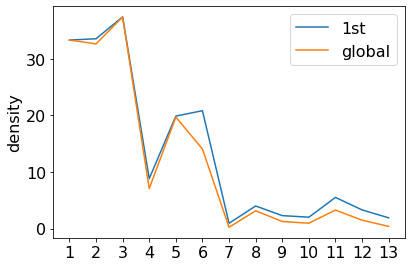

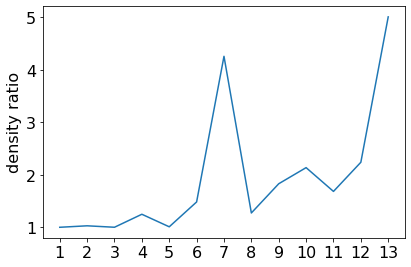

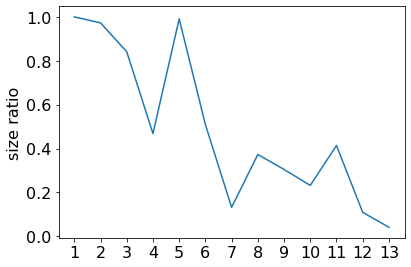

In [5]:
densities, results, global_den = multi_dsd(rand_motif3, len(G.nodes()), 1)

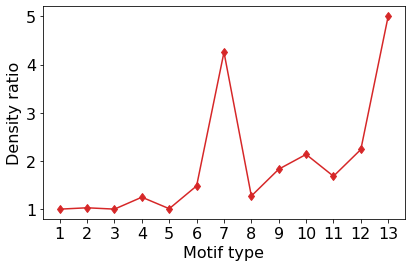

In [8]:
fig, ax1 = plt.subplots()
x_ticks = [str(i) for i in range(1,14)]
color = 'tab:red'
ax1.set_xlabel('Motif type')
ax1.set_ylabel('Density ratio')
for i in range(1):
    ax1.plot(x_ticks, densities[i]/global_den, color=color, marker='d', label='Density ratio')
# ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y')

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('Size', color=color)  # we already handled the x-label with ax1
# ax2.plot(x_ticks, [len(result[0])/len(G.nodes()) for result in results], color=color, marker='o', label='Size')
# ax2.tick_params(axis='y', labelcolor=color)
# plt.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('figs/concentrate/density.png')
plt.show()

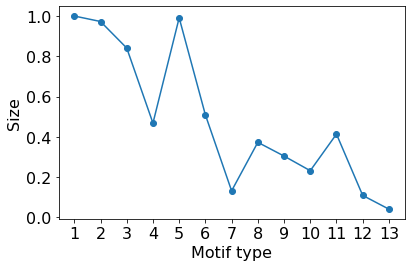

In [11]:
fig, ax2 = plt.subplots()
x_ticks = [str(i) for i in range(1,14)]
# color = 'tab:blue'
ax2.set_xlabel('Motif type')
# ax1.set_ylabel('Density ratio', color=color)
# for i in range(1):
#     ax1.plot(x_ticks, densities[i]/global_den, color=color, marker='d', label='Density ratio')
# # ax1.plot(t, data1, color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Size')  # we already handled the x-label with ax1
ax2.plot(x_ticks, [len(result[0])/len(G.nodes()) for result in results], color=color, marker='o', label='Size')
# ax2.tick_params(axis='y', labelcolor=color)
# plt.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('figs/concentrate/size.png')
plt.show()

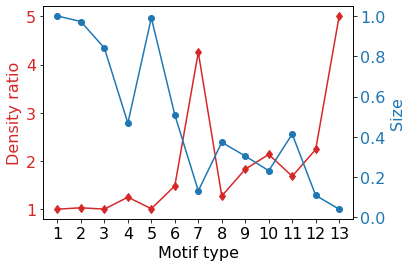

In [23]:
fig, ax1 = plt.subplots()
x_ticks = [str(i) for i in range(1,14)]
color = 'tab:red'
ax1.set_xlabel('Motif type')
ax1.set_ylabel('Density ratio', color=color)
for i in range(1):
    ax1.plot(x_ticks, densities[i]/global_den, color=color, marker='d', label='Density ratio')
# ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Size', color=color)  # we already handled the x-label with ax1
ax2.plot(x_ticks, [len(result[0])/len(G.nodes()) for result in results], color=color, marker='o', label='Size')
ax2.tick_params(axis='y', labelcolor=color)
# plt.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('figs/concentrate/density_size.png')
plt.show()

In [5]:
# def multi_dsd(G, rand_motif3, node_num, motif_choice, dsd_times=5):
motif_choice = [2,4,6,7,12]
dsd_times=5
results = []
left = []

for i in motif_choice:
    tmp_G = nx.DiGraph(G)
    cur_motif_list = rand_motif3[2][i]
    motif_list_by_nodelist = [list(m) for m in cur_motif_list]
    sub_re = [[] for dummy in range(dsd_times)]
    sub_left = [0.0 for dummy in range(dsd_times)]
    for j in range(dsd_times):
        result_s, density = dsd.exact_densest(motif_list_by_nodelist)
        tmp_G.remove_nodes_from(result_s)
        g = pyintergraph.nx2gt(tmp_G)
        motif_left = gt.motifs(g, 3)

        nxt_motif_list = []
        for motif in motif_list_by_nodelist:
            if not any(m in result_s for m in motif):
                nxt_motif_list.append(motif)

        motif_list_by_nodelist = nxt_motif_list
        num_left = 0
        for m in range(len(motif_left[0])):
            if gt.isomorphism(motif_left[0][m], rand_motif3[0][i]):
                num_left = motif_left[1][m]

#         motif_list_by_nodelist = [motif for motif in motif_list_by_nodelist if all(m in result_s for m in motif)]
        sub_re[j] = result_s
        sub_left[j] = num_left
        if len(motif_list_by_nodelist)==0:
            print('No more motif', i, 'left after finding', j+1, 'densest subgraph')
            break
    results.append(sub_re)
    left.append(sub_left)
#     return results, left


# results, left = multi_dsd(G, rand_motif3, len(G.nodes()), [2,4,6,7,12], 5)

No more motif 2 left after finding 2 densest subgraph
No more motif 4 left after finding 1 densest subgraph
No more motif 6 left after finding 5 densest subgraph
No more motif 7 left after finding 4 densest subgraph


In [48]:
left

[[8, 0, 0.0, 0.0, 0.0],
 [0, 0.0, 0.0, 0.0, 0.0],
 [14, 11, 5, 3, 0],
 [59, 30, 3, 0, 0.0],
 [60, 49, 35, 29, 14]]

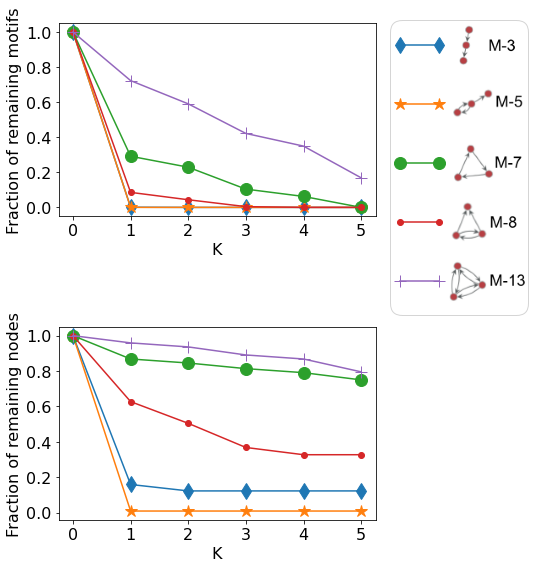

In [6]:
import matplotlib.lines
from matplotlib.transforms import Bbox, TransformedBbox
from matplotlib.legend_handler import HandlerBase
from matplotlib.image import BboxImage

class HandlerLineImage(HandlerBase):

    def __init__(self, path, space=15, offset = 10 ):
        self.space=space
        self.offset=offset
        self.image_data = plt.imread(path)        
        super(HandlerLineImage, self).__init__()

    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):

        l = matplotlib.lines.Line2D([xdescent+self.offset,xdescent+(width-self.space)/3.+self.offset],
                                     [ydescent+height/2., ydescent+height/2.])
        l.update_from(orig_handle)
        l.set_clip_on(False)
        l.set_transform(trans)

        bb = Bbox.from_bounds(xdescent +(width+self.space)/3.+self.offset,
                              ydescent,
                              height*self.image_data.shape[1]/self.image_data.shape[0],
                              height)

        tbb = TransformedBbox(bb, trans)
        image = BboxImage(tbb)
        image.set_data(self.image_data)

        self.update_prop(image, orig_handle, legend)
        return [l,image]

fig = plt.figure(figsize=(9,8))
lines = []
markers = ['d','*','o','.','+']
plt.subplot(2, 1, 1)
for i in range(5):
    line, = plt.plot(np.array([rand_motif3[1][motif_choice[i]]]+left[i])/rand_motif3[1][motif_choice[i]], marker=markers[i], markersize=12)
    lines.append(line)
    
plt.legend(lines, ["", "", "", "", ""], ncol=1,
   handler_map={ lines[0]: HandlerLineImage("motif3_label.png"), lines[1]: HandlerLineImage("motif5_label.png"),lines[2]: HandlerLineImage("motif7_label.png"),lines[3]: HandlerLineImage("motif8_label.png"),lines[4]: HandlerLineImage("motif13_label.png")}, 
   handlelength=2.2, labelspacing=0, fontsize=60, borderpad=0., loc='upper right', 
    handletextpad=0.1, borderaxespad=0.1, bbox_to_anchor=(1.5, 1.05))
plt.xlabel('K')
plt.ylabel('Fraction of remaining motifs')

plt.subplot(2, 1, 2)
for i in range(5):
    tmp = [G.number_of_nodes()]
    for t in range(dsd_times):
        tmp.append(tmp[t] - len(results[i][t]))
    plt.plot([float(t)/G.number_of_nodes() for t in tmp], marker=markers[i], markersize=12)
plt.xlabel('K')
plt.ylabel('Fraction of remaining nodes')

fig.tight_layout()
plt.savefig('figs/concentrate/top_k_dsd.png')
plt.show()

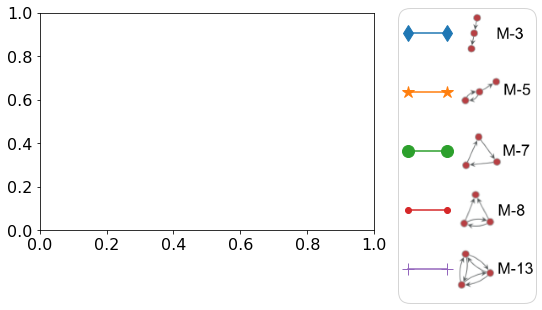

In [8]:
legend = plt.legend(lines, ["", "", "", "", ""], ncol=1,
   handler_map={ lines[0]: HandlerLineImage("motif3_label.png"), lines[1]: HandlerLineImage("motif5_label.png"),lines[2]: HandlerLineImage("motif7_label.png"),lines[3]: HandlerLineImage("motif8_label.png"),lines[4]: HandlerLineImage("motif13_label.png")}, 
   handlelength=2.2, labelspacing=0, fontsize=60, borderpad=0., loc='upper right', 
    handletextpad=0.1, borderaxespad=0.1, bbox_to_anchor=(1.5, 1.05))
def export_legend(legend, filename="legend.png"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

export_legend(legend)
plt.show()

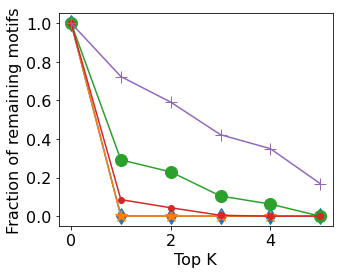

In [12]:
fig = plt.figure(figsize=(5,4))

for i in range(5):
    line, = plt.plot(np.array([rand_motif3[1][motif_choice[i]]]+left[i])/rand_motif3[1][motif_choice[i]], marker=markers[i], markersize=12)
    lines.append(line)
    
plt.xlabel('Top K')
plt.ylabel('Fraction of remaining motifs')
plt.tight_layout()
plt.savefig('figs/concentrate/top_k_dsd_left.png')
plt.show()

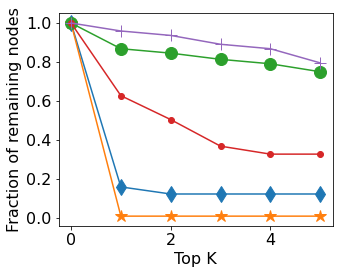

In [11]:
fig = plt.figure(figsize=(5,4))
for i in range(5):
    tmp = [G.number_of_nodes()]
    for t in range(dsd_times):
        tmp.append(tmp[t] - len(results[i][t]))
    plt.plot([float(t)/G.number_of_nodes() for t in tmp], marker=markers[i], markersize=12)
plt.xlabel('Top K')
plt.ylabel('Fraction of remaining nodes')

fig.tight_layout()
plt.savefig('figs/concentrate/top_k_dsd_right.png')
plt.show()

In [34]:
gt.isomorphism(motif_left[0][m], rand_motif3[0][i])

[7331, 7180, 8228, 1554, 4334, 3092, 48, 689, 274, 206, 719, 323, 83]

In [ ]:
h_list = []
removed_nodes = []
pairs= [([list(i) for i in motif3[2][7]],1)]
for i in range(1):
#     print('!!', len(pairs[0][0]))
    node_d, fibheap = init_heap_and_dict(pairs)
    results = peel_by_motif(node_d, fibheap, pairs, 1, False)
    H = num_labeled_G.subgraph(results[1])
    removed_nodes += list(H.nodes)
    h_list.append(H)
    
    rates = nx.get_edge_attributes(H, "rate")
    value_list = np.array(list(rates.values()))
    tmp = np.array(list(rates.values()))
    print(tmp[tmp<0].shape)
    vs = plt.hist(value_list)
    plt.show()
    print(len(value_list[value_list<0])/len(value_list))
    colors = ['g' if H[u][v]['rate']>0 else 'r' for u,v in H.edges]
    nx.draw_shell(H, node_size=50, edge_color=colors, arrowsize=20)
    plt.show()
    
    new_pairs = []
    for pair in pairs:
        temp_motif_list = []
#         print(len(pair[0]))
        for motif in pair[0]:
#             print(motif)
            flag = 0
            for node in motif:
                
                if node in removed_nodes:
                    flag = 1
                    break
            if flag == 0:
                temp_motif_list.append(motif)
        new_pairs.append((temp_motif_list, pair[1]))
#         print(len(temp_motif_list))
    pairs = new_pairs

# Create hierarchical decomposition of the network

In [103]:
def coverage(setA, setB):
    if len(setA)<len(setB):
#         print('set A is smaller than set B!')
        return -1
    if len(setB)==0:
        return -1
    if (setA)==setB:
        print('two sets are the same!!')
        return 0
    return len(setA & setB)/len(setB)

In [113]:
node_names = {}
for i in range(13*5):
    node_names[i] = str(1+int(i/5)) + 'motif ' + str(1+i%5)+'dsd'

tree = nx.DiGraph()
for i in range(13*5):
    for j in range(13*5):
        if i==j:
            continue
        temp = coverage(set(results[int(i/5)][i%5]), set(results[int(j/5)][j%5]))
        if temp>0.75:
            tree.add_edge(node_names[i], node_names[j])

In [114]:
to_remove = []
for i in tree.nodes():
    for j in tree[i]:
        for k in tree[j]:
            if k in tree[i]:
                to_remove.append((i,k))
                
tree.remove_edges_from(to_remove)

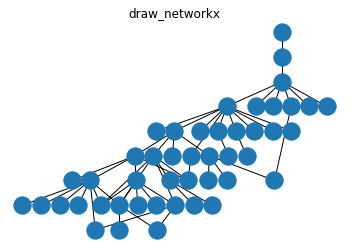

In [115]:
from networkx.drawing.nx_agraph import graphviz_layout

nx.nx_agraph.write_dot(tree,'test.dot')

# same layout using matplotlib with no labels
plt.title('draw_networkx')
pos=graphviz_layout(tree, prog='dot')
nx.draw(tree, pos, with_labels=False, arrows=False)

<img src="hierarchy.png">

# subgraphs concentrated with motif 13

number of nodes 9


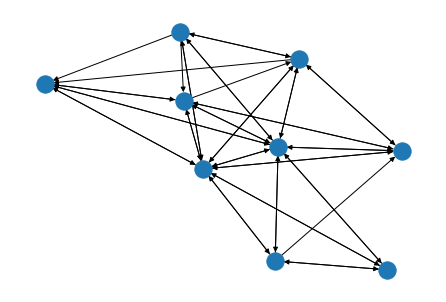

number of nodes 5


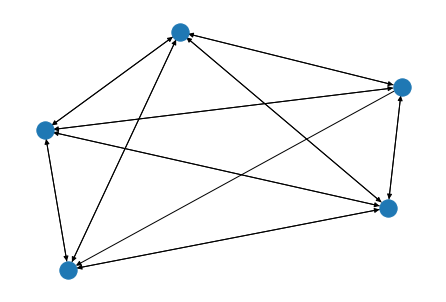

number of nodes 10


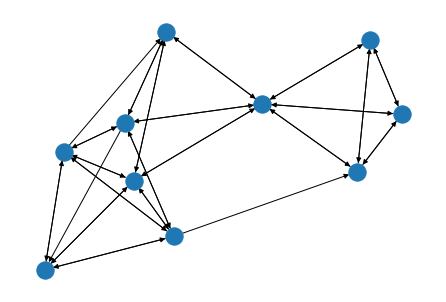

number of nodes 5


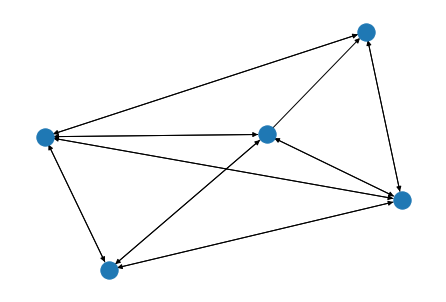

number of nodes 16


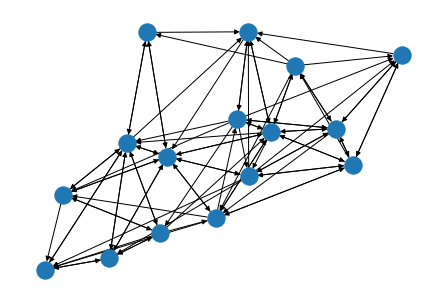

In [65]:
for sub in results[12]:
    if len(sub)==0:
        break
    print('number of nodes', len(sub))
    nx.draw(G.subgraph(sub))
    plt.show()

24


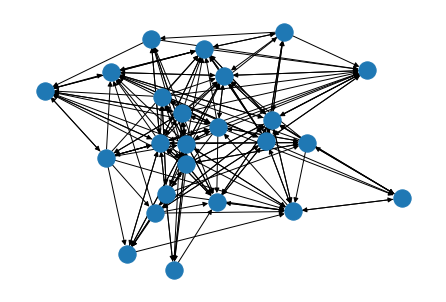

In [41]:
print(len(results[11]))
nx.draw(G.subgraph(results[11]))

# evaluate random models with respect to this

# dual config model

No more motif 0 left after finding 1 densest subgraph
No more motif 1 left after finding 1 densest subgraph
No more motif 2 left after finding 1 densest subgraph
No more motif 3 left after finding 3 densest subgraph
No more motif 4 left after finding 1 densest subgraph
No more motif 5 left after finding 2 densest subgraph
No more motif 6 left after finding 2 densest subgraph
No more motif 7 left after finding 4 densest subgraph
No more motif 8 left after finding 5 densest subgraph
No more motif 9 left after finding 2 densest subgraph
No more motif 10 left after finding 4 densest subgraph
No more motif 11 left after finding 3 densest subgraph
No more motif 12 left after finding 3 densest subgraph


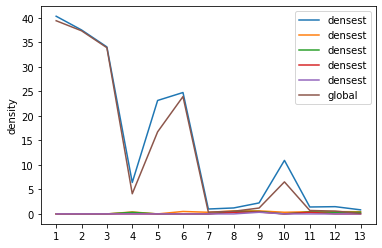

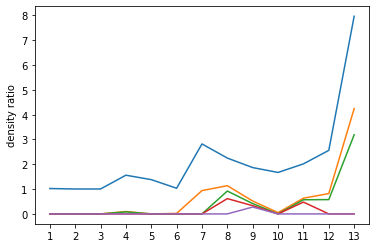

In [73]:
str2gt = {'000000000000000000000000000000800000000000000080': 1, '000000000000000000000000000000800000000000000040': 2, '0000000000000000000000000000000000000000000000c0': 0, '0000000000000000000000000000002000000000000000c0': 4, '000000000000004000000000000000800000000000000080': 5, '0000000000000020000000000000002000000000000000c0': 9, '0000000000000000000000000000008000000000000000c0': 3, '000000000000000000000000000000a000000000000000c0': 7, '000000000000004000000000000000a000000000000000c0': 11, '0000000000000040000000000000008000000000000000c0': 8, '0000000000000040000000000000002000000000000000c0': 10, '000000000000006000000000000000a000000000000000c0': 12, '000000000000004000000000000000200000000000000080': 6}
un_deg = [len([v for v in G[u] if u in G[v]]) for u in G.nodes]
lamd1 = sum([un_deg[i]*un_deg[j] for j in range(len(un_deg)) for i in range(j+1, len(un_deg))])/(sum(un_deg)/2)

indeg = [i[1] for i in G.in_degree]
outdeg = [i[1] for i in G.out_degree]

indeg = [indeg[i]-un_deg[i] for i in range(len(indeg))]
outdeg = [outdeg[i]-un_deg[i] for i in range(len(indeg))]
lamd2 = sum([i*j for i in indeg for j in outdeg])/(len(G.edges)-sum(un_deg))

double_config_counts = []
for time in range(1):
    rand_G = gt.Graph()
    rand_G.add_vertex((len(un_deg)))
    for i in range(len(un_deg)):
        for j in range(i+1, len(un_deg)):
            if random.uniform(0, 1)<un_deg[i]*un_deg[j]/lamd1:
                rand_G.add_edge(i,j)
                rand_G.add_edge(j,i)
    for i in range(len(indeg)):
        for j in range(len(outdeg)):
            if i!=j and rand_G.edge(i,j) is None and random.uniform(0, 1)<indeg[i]*outdeg[j]/lamd2:
                rand_G.add_edge(i,j)
    rand_motif3 = gt.motifs(rand_G, 3, return_maps=True)
    
    multi_dsd(rand_motif3, len(rand_G.nodes()))

In [70]:
np.mean(double_config_counts,axis=1)

array([8296.13333333, 8081.56666667, 7587.03333333,  865.46666667,
       3670.03333333, 5534.56666667,   57.46666667,  112.26666667,
        258.43333333,  971.7       ,  724.6       ,  147.13333333,
         29.36666667])

# k core model

No more motif 0 left after finding 5 densest subgraph
No more motif 1 left after finding 1 densest subgraph
No more motif 2 left after finding 1 densest subgraph
No more motif 3 left after finding 1 densest subgraph
No more motif 4 left after finding 1 densest subgraph
No more motif 5 left after finding 1 densest subgraph
No more motif 6 left after finding 4 densest subgraph
No more motif 7 left after finding 5 densest subgraph
No more motif 8 left after finding 5 densest subgraph
No more motif 10 left after finding 4 densest subgraph
No more motif 11 left after finding 5 densest subgraph
No more motif 12 left after finding 3 densest subgraph


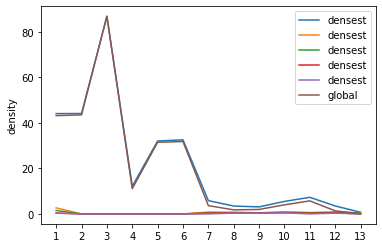

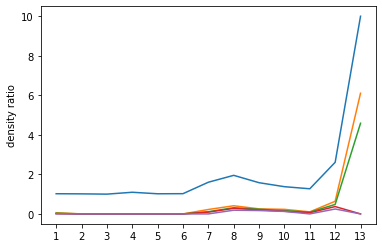

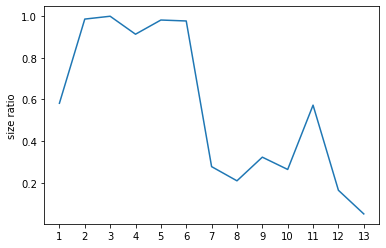

In [83]:

for step in range(8,9):
    
    edge_df = pd.read_csv('dataset/Timelapsed/C-elegans-timelapsed-0'+str(step)+'-condensed-edges.csv')
    G = nx.from_pandas_edgelist(edge_df, 'Pre Synaptic Neuron ID', 'Post Synaptic Neuron ID', create_using=nx.DiGraph)
    un_deg = [len([v for v in G[u] if u in G[v]]) for u in G.nodes]
#     print('original graph has', len(G.edges()),'edges')
    edge_df = pd.read_csv('dataset/Timelapsed/C-elegans-timelapsed-0'+str(step)+'-condensed-edges.csv')
    uG = nx.from_pandas_edgelist(edge_df, 'Pre Synaptic Neuron ID', 'Post Synaptic Neuron ID', create_using=nx.Graph)
    p = sum(un_deg)/len(uG.edges())/2
    
    mypath = 'k_core_results/'+str(step)+'_final/'

    from os import listdir
    from os.path import isfile, join
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

    for f_name in onlyfiles:
        edge_df = pd.read_csv(mypath+f_name)
        G = nx.from_pandas_edgelist(edge_df, 'I', 'J')
        gt_G = gt.Graph()
        edge_count = 0
#         p = 264.0/1929
        for e in G.edges:
            if random.uniform(0,1)<p:
                gt_G.add_edge(e[0],e[1])
                gt_G.add_edge(e[1],e[0])
                edge_count += 2
            elif random.uniform(0,1)<0.5:
                gt_G.add_edge(e[0],e[1])
                edge_count += 1
            else:
                gt_G.add_edge(e[1],e[0])
                edge_count += 1

        rand_motif3 = gt.motifs(gt_G, 3, return_maps=True)
        break
    multi_dsd(rand_motif3, len(G.nodes()))

## synthetic

In [169]:
# for clique
def str_num(s, i):
    n = 0
    fac = 32
    for j in range(6):
        if j!=i:
            n += int(s[j])*fac
        else:
            n += (1-int(s[j]))*fac
        fac = fac/2
    return n

def num_str(n):
    res = []
    fac = 32
    s = ''
    for i in range(6):
        if n>=fac:
            dig = '1'
            n -= fac
        else:
            dig = '0'
        fac = fac/2
        s+=dig
    for i in range(6):
        res.append(str_num(s, i))
    return res

G = nx.erdos_renyi_graph(100, 0.0459)

H = nx.erdos_renyi_graph(6, 1)

for i in range(64):
    for j in num_str(i):
        H.add_edge(37+i,37+j)

In [170]:
mid = 38
for i in range(6, mid):
    H.add_edge(i-1,i)

In [171]:
g = gt.Graph(directed=False)
h = gt.Graph(directed=False)
for i in G.edges():
    g.add_edge(i[0], i[1])
for i in H.edges():
    h.add_edge(i[0], i[1])

In [172]:
gt.motifs(g, 3)

([<Graph object, undirected, with 3 vertices and 2 edges, at 0x7fe858e95a90>,
  <Graph object, undirected, with 3 vertices and 3 edges, at 0x7fe858f6c0d0>],
 [1045, 20])

In [173]:
gt.motifs(h, 3)

([<Graph object, undirected, with 3 vertices and 2 edges, at 0x7fe858f6cc10>,
  <Graph object, undirected, with 3 vertices and 3 edges, at 0x7fe858f6c850>],
 [1002, 20])

In [87]:
# for i in range(mid, 100):
#     H.add_edge(mid-1,i)

In [88]:
star = nx.Graph()
star.add_edges_from([(0,1),(0,2),(0,3)])
iso = nx.algorithms.isomorphism.ISMAGS(H, star)
res = iso.find_isomorphisms()

iso2 = nx.algorithms.isomorphism.ISMAGS(G, star)
res2 = iso2.find_isomorphisms()
print(len(list(res)), len(list(res2)))

12341 11590


In [89]:
sum(dict(nx.triangles(G)).values())/3

151.0

In [90]:
sum(dict(nx.triangles(H)).values())/3

165.0

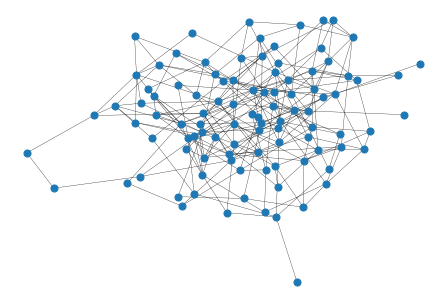

In [180]:
nx.draw(G, node_size=50, width=0.3)
plt.savefig('figs/concentrate/motivation1.png')
plt.show()

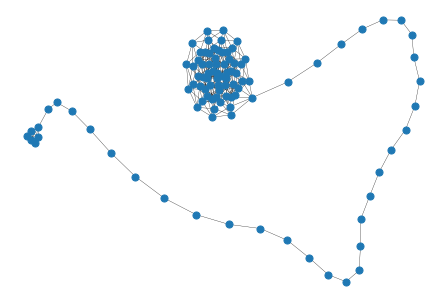

In [179]:
pos = nx.spring_layout(H, k=0.1)
nx.draw(H, pos, node_size=50, width=0.3)
plt.savefig('figs/concentrate/motivation2.png')
plt.show()

In [181]:
G.number_of_edges(), H.number_of_edges()

(240, 239)